# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = pd.merge(study_results,mouse_metadata, on = "Mouse ID", how ="left")

# Display the data table for preview
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_duplicate = mouse_results[mouse_results.duplicated()]

mouse_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_results = pd.DataFrame(mouse_results.loc[mouse_results["Mouse ID"] != "g989"])

clean_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice in the clean DataFrame.
mouse_number = len(clean_results["Mouse ID"].unique())

mouse_number

248

## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Create groupby variable shortcut for drug regimen
mouse_reg = clean_results.groupby("Drug Regimen")


#Calculate summary statistics: mean, median, variance, standard deviation, and SEM
mouse_mean = mouse_reg["Tumor Volume (mm3)"].mean()

mouse_median = mouse_reg["Tumor Volume (mm3)"].median()

mouse_variance = mouse_reg["Tumor Volume (mm3)"].var()

mouse_stdev = mouse_reg["Tumor Volume (mm3)"].std()

mouse_SEM = mouse_reg["Tumor Volume (mm3)"].sem()

#Create data frame for summary statistics results
regimen_df = pd.DataFrame({
    "Mean Tumor Volume": mouse_mean,
    "Median Tumor Volume": mouse_median,
    "Tumor Volume Variance": mouse_variance,
    "Tumor Volume Std. Dev.": mouse_stdev,
    "Tumor Volume Std. Err.": mouse_SEM
})


#Display summary statistics table 
regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_df_adv = mouse_reg["Tumor Volume (mm3)"].agg(["mean", "median","var", "std","sem"])

regimen_df_adv

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

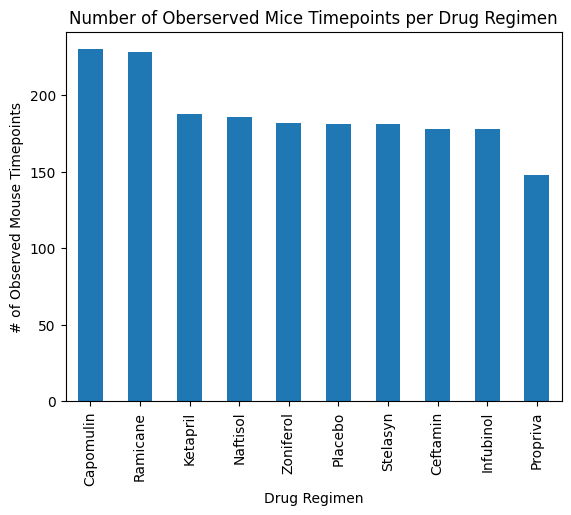

<Figure size 640x480 with 0 Axes>

In [7]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas

result_count = mouse_reg["Mouse ID"].count().sort_values(ascending=False)

result_chart = result_count.plot(kind="bar", title = "Number of Oberserved Mice Timepoints per Drug Regimen")

result_chart.set_xlabel("Drug Regimen")

result_chart.set_ylabel("# of Observed Mouse Timepoints")


plt.show()
plt.tight_layout()


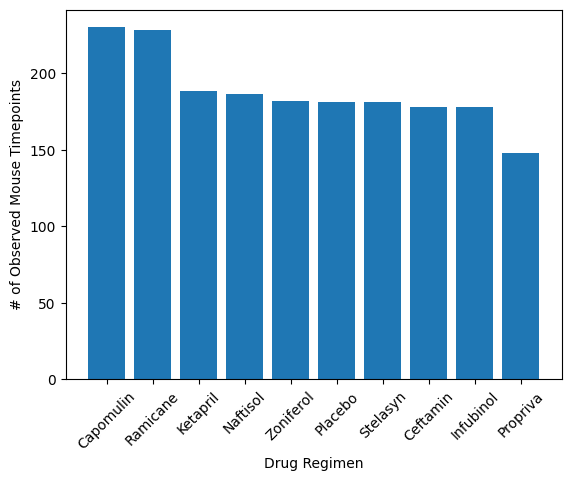

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(result_count.keys(),result_count)
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel("# of Observed Mouse Timepoints");

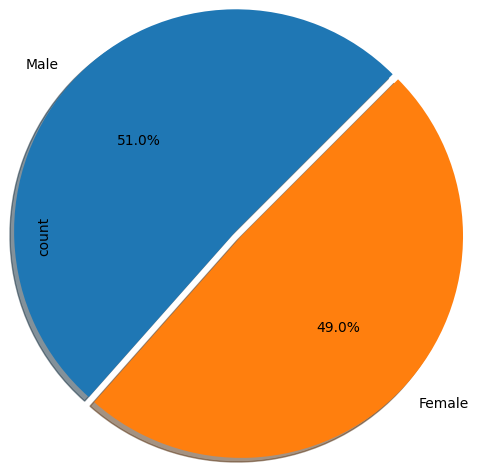

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_df=clean_results.Sex.value_counts()
pie_df.plot.pie(autopct='%.1f%%',explode=[.05,0],shadow=True,startangle=45,radius=1.5);

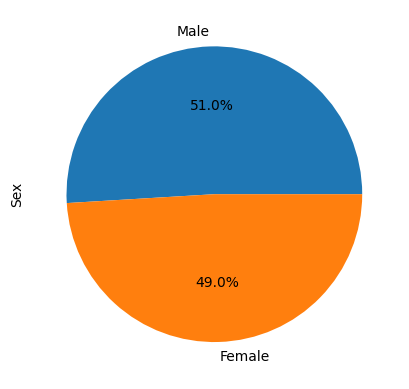

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_df, labels=pie_df.keys(), autopct = "%.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

last_timepoint = clean_results.groupby('Mouse ID')['Timepoint'].max()
last_tumor_volume= pd.merge(last_timepoint, mouse_results, on=['Mouse ID', 'Timepoint'])
last_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [12]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

tumor_list = []

for drug in drugs:
    tumor = last_tumor_volume[last_tumor_volume['Drug Regimen']==drug]['Tumor Volume (mm3)']
    tumor_list.append(tumor)

    iqr = tumor.quantile(.75) - tumor.quantile(.25)
    upper = tumor.quantile(.75) + 1.5*iqr
    lower = tumor.quantile(.25) - 1.5*iqr

    print(f"{drug}'s potential outliers: {tumor[(tumor<=lower)|(tumor>=upper)]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


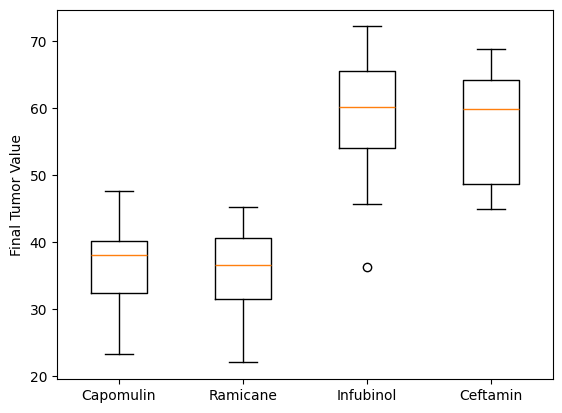

In [13]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_list, labels=drugs)
plt.ylabel("Final Tumor Value");

## Line and Scatter Plots

<Axes: xlabel='Timepoint'>

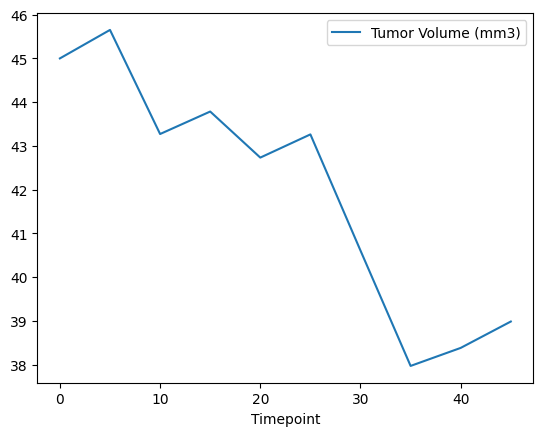

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
clean_results[clean_results["Mouse ID"]=="b128"].plot("Timepoint", "Tumor Volume (mm3)")

<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

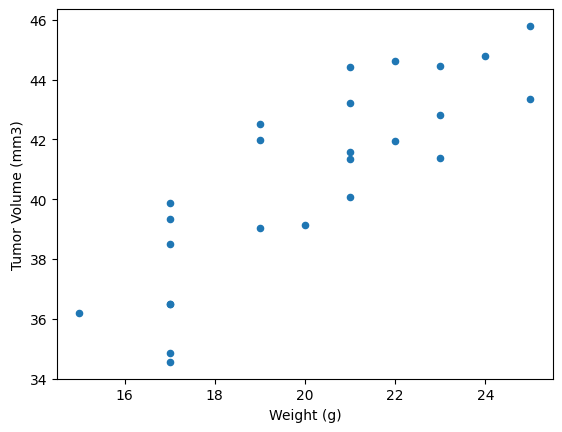

In [15]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df_plot = clean_results[clean_results["Drug Regimen"]== "Capomulin"].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
df_plot.plot.scatter("Weight (g)","Tumor Volume (mm3)")


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = clean_results[clean_results["Drug Regimen"]== "Capomulin"].groupby("Mouse ID")[["Weight (g)"]].mean()
y_values = clean_results[clean_results["Drug Regimen"]== "Capomulin"].groupby("Mouse ID")[["Tumor Volume (mm3)"]].mean()
(slope, intercept, rvalue, pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values *slope + intercept
line_eq="y=" 
df_plot.plot.scatter("Weight (g)","Tumor Volume (mm3)")

ValueError: too many values to unpack (expected 4)